In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import os
from skimage.io import imread
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 15,
})

In [7]:
df = pd.read_csv('../../SAXS/saxs_data.txt', delimiter=' ')
dfit = pd.read_csv('../../SAXS/saxs_fit.txt', delimiter=' ')
pdi = pd.read_csv('../../SAXS/saxs_pdi.txt', delimiter=' ')

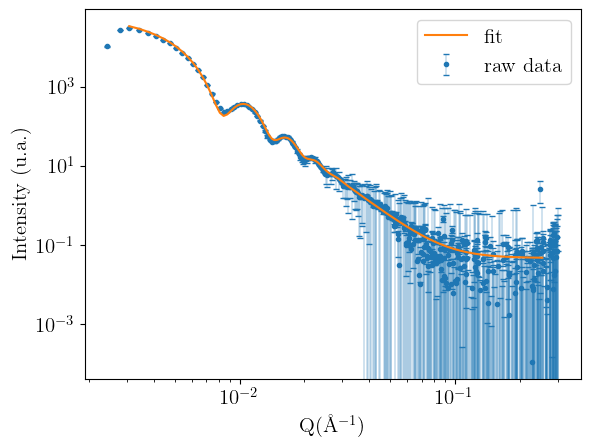

In [8]:
fig, ax = plt.subplots()
ax.errorbar(df['<X>'], df['<Y>'], yerr=df['<dY>'], label='raw data', capsize = 2, elinewidth = 0.3, capthick = 1, fmt='.', zorder=1)
ax.plot(dfit['<X>'], dfit['<Y>'], zorder=2, label='fit')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'Q(\AA$^{-1})$')
ax.set_ylabel(r'Intensity (u.a.)')
ax.legend()
x = pdi['<X>']
y = pdi['<Y>']
mean = sum(x * y) / sum(y)
sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), mean, sigma])
#ax[1].annotate(fr'$\mu={popt[1]:.0f}$Å'
#               '\n'
#               fr'$\sigma={popt[2]:.2f}$Å', 
#                xy=(0.8, 0.8), xycoords='axes fraction',
#                ha='center')
#
#ax[1].plot(pdi['<X>'], pdi['<Y>'])
#ax[1].set_xlabel(r'Radius (\r{A})')
#ax[1].set_ylabel(r'Probability (normalized)')
plt.savefig('../figures/saxs.png', dpi=300)
plt.show()

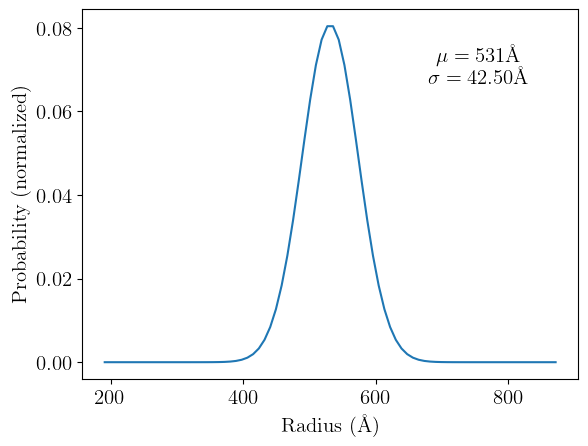

In [9]:
fig, ax = plt.subplots()

ax.annotate(fr'$\mu={popt[1]:.0f}$Å'
            '\n'
            fr'$\sigma={popt[2]:.2f}$Å', 
             xy=(0.8, 0.8), xycoords='axes fraction',
             ha='center')

ax.plot(pdi['<X>'], pdi['<Y>'])
ax.set_xlabel(r'Radius (\r{A})')
ax.set_ylabel(r'Probability (normalized)')
plt.savefig('../figures/saxs_pdi.png', dpi=300)
plt.show()

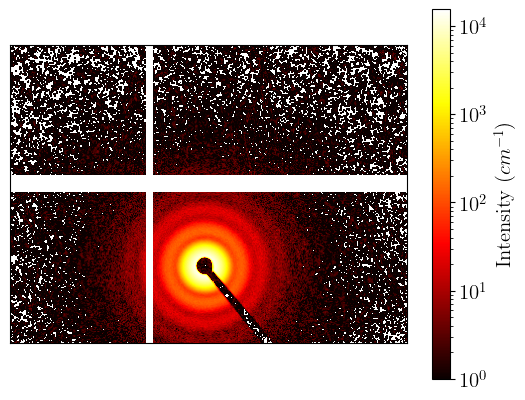

In [12]:
dd = imread('../../SAXS/image_5pc.tif')
plt.figure()
plt.imshow(dd[700:1000,350:750], norm='log', cmap='hot')
plt.xticks([])
plt.yticks([])
plt.colorbar(label=r'Intensity $(cm^{-1})$')
plt.savefig('../figures/saxs_im.png', dpi=300)
plt.show()